In [1]:
# Telecom Customer Churn Prediction
## Libraries
#Imported necessary libraries for data analysis, visualization, and modeling.

In [32]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [3]:
df=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [4]:
df.shape

(7043, 21)

In [5]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

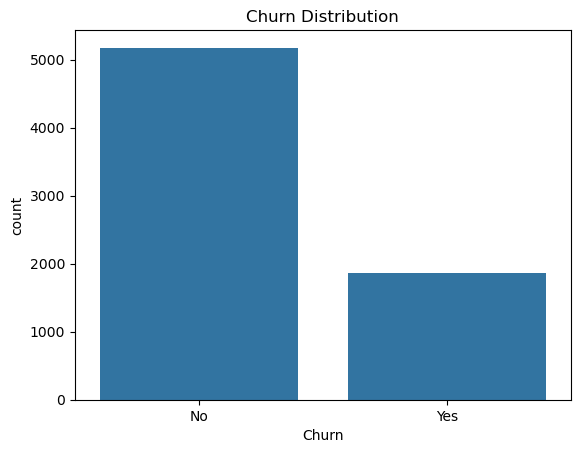

In [9]:
sns.countplot(x="Churn", data=df)
plt.title('Churn Distribution')
plt.show()

In [11]:
# 2. Detailed Exploratory Data Analysis 
#Exploring relationship between features an Churn to identify key drivers.

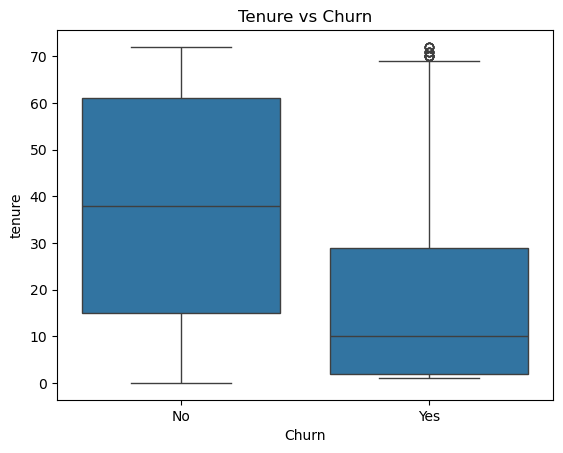

In [13]:
sns.boxplot(x="Churn", y="tenure",data=df)
plt.title("Tenure vs Churn")
plt.show()

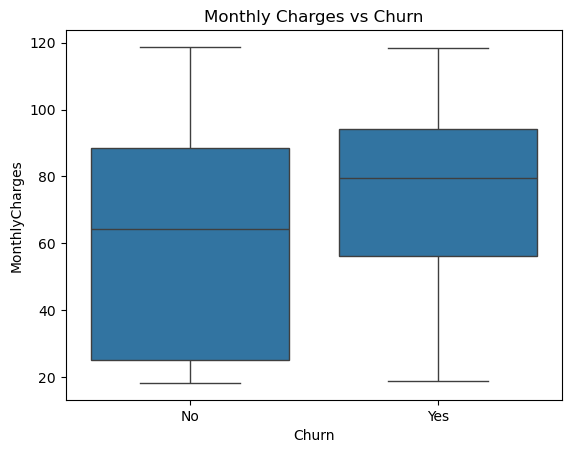

In [15]:
sns.boxplot(x="Churn",y="MonthlyCharges" ,data=df)
plt.title("Monthly Charges vs Churn")
plt.show()

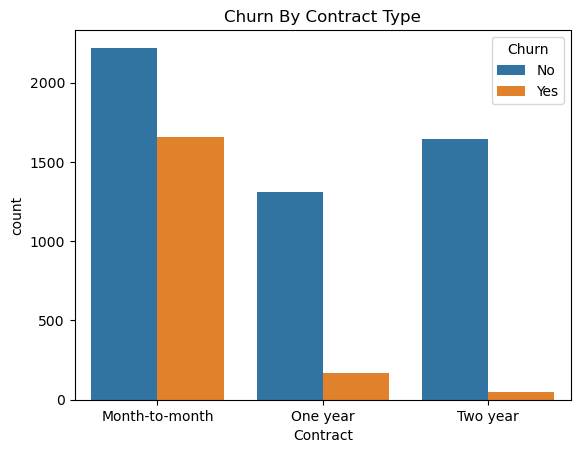

In [17]:
#Churn by contract type 
sns.countplot(x='Contract', hue ='Churn', data=df)
plt.title("Churn By Contract Type")
plt.show()



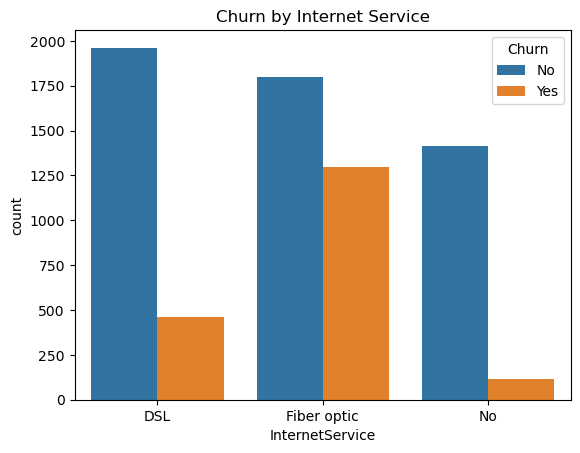

In [19]:
# Churn by Internet Service
sns.countplot(x='InternetService', hue='Churn', data=df)
plt.title('Churn by Internet Service')
plt.show()

In [ ]:
### Observations
'''- Customers who churn tend to have shorter tenure (e.g., median ~10 months vs. 40 for non-churn).
- Month-to-month contracts show a higher churn rate than one-year or two-year contracts.
- [Add insights from your plots, e.g., "Fiber optic users have higher churn."]'''

In [ ]:
## 3. Correlation Analysis and Additional Features
#Analyzing correlations and exploring more features to confirm churn drivers.

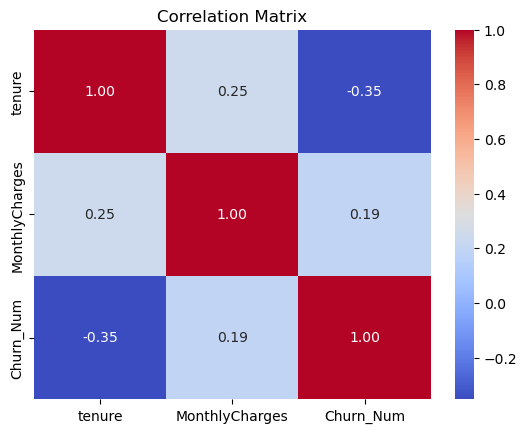

In [25]:
# Convert Churn to numerical
df['Churn_Num'] = df['Churn'].map({'No': 0, 'Yes': 1})

# Correlation matrix for numerical features
numerical_cols = ['tenure', 'MonthlyCharges', 'Churn_Num']
corr_matrix = df[numerical_cols].corr()

# Heatmap of correlations
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

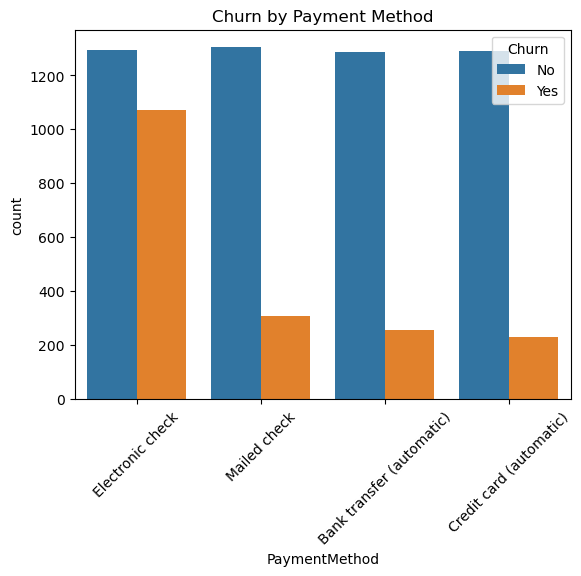

In [27]:
# Churn by Payment Method
sns.countplot(x='PaymentMethod', hue='Churn', data=df)
plt.title('Churn by Payment Method')
plt.xticks(rotation=45)
plt.show()

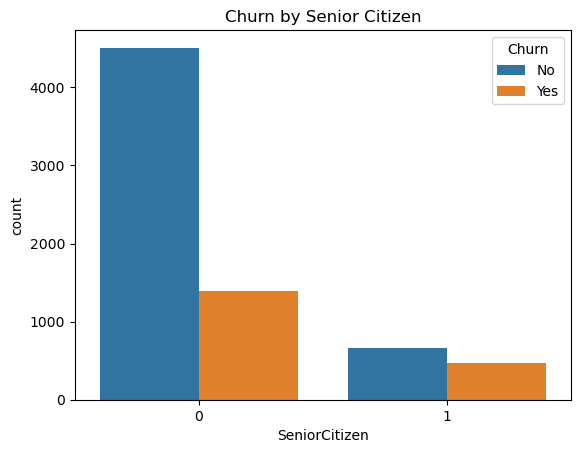

In [30]:
# Churn by Senior Citizen
sns.countplot(x='SeniorCitizen', hue='Churn', data=df)
plt.title('Churn by Senior Citizen')
plt.show()

In [ ]:
### Observations
'''
- Tenure has a [e.g., negative] correlation with Churn ([e.g., -0.35]), indicating longer tenure reduces churn likelihood.
- [e.g., Electronic check users have a higher churn rate than automatic payment users.]
- [e.g., Senior citizens show slightly higher churn.]
'''

In [ ]:
## 4. Data Preprocessing
'''
Preparing data for logistic regression by handling missing values, encoding categorical variables, and scaling numerical features.
'''

In [38]:
# Check missing values
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
Churn_Num           0
dtype: int64


In [34]:
# Convert TotalCharges to numeric, handle blanks
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)
# Verify no missing values
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
Churn_Num           0
dtype: int64


C:\Users\udita\AppData\Local\Temp\ipykernel_27336\3919109344.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].mean(), inplace=True)


In [40]:
# Encode binary categorical columns
le = LabelEncoder()
df['Churn'] = le.fit_transform(df['Churn'])  # Yes=1, No=0
df['Gender'] = le.fit_transform(df['Gender'])  # Female=0, Male=1
df['SeniorCitizen'] = df['SeniorCitizen'].astype(int)  # Already 0/1

KeyError: 'Gender'